In [10]:
import numpy as np
import math as m
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sympy import init_session
from scipy.fftpack import dct,idct,fft,ifft,dst,idst
from scipy import linalg as la
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.stats import linregress as linreg
from sympy import*

In [11]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact),2)/np.linalg.norm((uexact),2)
def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

In [6]:
def f(t,y):
    return y-t**2 -1
def yexact(t):
    return t**2 +2*t +1 -0.5 *np.exp(t)

In [35]:
def rk41(f,a,b,y,N):
    h=(b-a)/(N-1)
    t=np.linspace(a,b,N)
    ys=[y]
#     y=y
    for i in range(0,N-1):
        y1=h*f(t[i],y)
        y2=h*f(t[i]+(h/2),y+(y1/2))
        y3=h*f(t[i]+(h/2),y+(y2/2))
        y4=h*f(t[i]+h,y+y3)
        y=y+(y1/6)+(y2/3)+(y3/3)+(y4/6)
        ys.append(y)
    return ys,t

In [55]:
    N=5
    dt=(b-a)/(N-1)
    t=np.linspace(a,b,N)
    y0=0.5
    y=y0
    ys=[y]
    for i in range(0,N-1):
        y1=dt*f(t[i+1],y)
        y2=dt*f(t[i+1]+(dt/2),y+(y1/2))
        y3=dt*f(t[i+1]+(dt/2),y+(y2/2))
        y4=dt*f(t[i+1]+dt,y+y3)
        y=y+(y1/6)+(y2/3)+(y3/3)+(y4/6)
        ys.append(y)

In [54]:
ys

[0.5,
 -0.18229166666666666,
 -1.9417724609375,
 -5.801150957743327,
 -13.446298323571682]

In [31]:
a,b=0,2
y0=0.5
N=[50,100,200,400]
yn=[]
tn=[]
err1=[]
for N in N:
    y,t=rk41(f,a,b,y0,N)
    yn.append(y)
    tn.append(t)
for i in range(0,len(yn)):
    err=relerr(yn[i],yexact(tn[i]))
    err1.append(err)

In [32]:
yn

[[0.5,
  0.4791467192700247,
  0.457286335826689,
  0.4342380816367808,
  0.4098136577331558,
  0.3838169204702943,
  0.3560435547090256,
  0.32628073338587954,
  0.29430676289983754,
  0.2598907137256259,
  0.22279203563807726,
  0.18276015690644648,
  0.13953406679085578,
  0.09284188064522424,
  0.042400386902054193,
  -0.01208542481574146,
  -0.07092285524223237,
  -0.13443200749410267,
  -0.2029463204276608,
  -0.27681312421590837,
  -0.3563942190713729,
  -0.4420664780789746,
  -0.5342224751433691,
  -0.6332711390970555,
  -0.7396384350591256,
  -0.8537680741799376,
  -0.9761222529542942,
  -1.1071824233349694,
  -1.2474500949297527,
  -1.3974476706186325,
  -1.5577193169834274,
  -1.7288318710001793,
  -1.9113757845050419,
  -2.1059661080073377,
  -2.3132435154890163,
  -2.5338753718980374,
  -2.7685568451143423,
  -3.018012064241175,
  -3.2829953261517013,
  -3.564292352301277,
  -3.8627215978994767,
  -4.1791356156232204,
  -4.5144224761432366,
  -4.869507247830727,
  -5.24535

205.928726680406

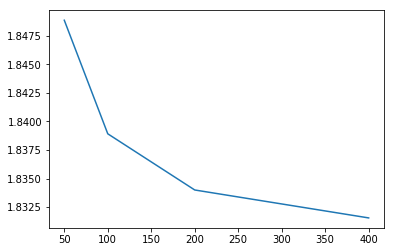

In [18]:
N=[50,100,200,400]
plt.plot(N,err1)
order=-linreg(np.log(err1),np.log(N))[0]
order